 ---
 # Prática 2: Amplificador operacional
 ---
> Autores: Jorge del Rio Lopez, Carlos Gonzalez Garcia y Javier Rodriguez Urbano.
>
> Fecha:2024-10-29
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [321]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [322]:
xlsx_name="P2_sesion1_plantillaMedidas.ods"

In [323]:
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)
def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

---
<h1 style="text-align: center;">[P2.C1]</h1>

---

In [324]:
DatosResistencia = pd.read_excel(xlsx_name,sheet_name='Resistencias',usecols='A:C')
Rmedida1=DatosResistencia["R1"].tolist()
Rmedida2=DatosResistencia["R2"].tolist()
Rmedida3=DatosResistencia["R3"].tolist()
print(f'Las medidas de las resistencias son: \nR1 Teorico: {Rmedida1[0]} KOhms   R1 Práctico: {Rmedida1[1]} KOhms')
print(f'R2 Teorico: {Rmedida2[0]} KOhms   R2 Práctico: {Rmedida2[1]} KOhms')
Rmedida1,Rmedida2,Rmedida3 = ConverArray3(Rmedida1,Rmedida2,Rmedida3)



Las medidas de las resistencias son: 
R1 Teorico: 4700 KOhms   R1 Práctico: 4580 KOhms
R2 Teorico: 10000 KOhms   R2 Práctico: 9920 KOhms


Con estos valores de las resistencias teoricos, obtenemos la ganancia teórica, esta ganancia tiene la siguiente expressión:

$A_V\ =\ -\dfrac{R_2}{R_1}$


In [325]:
print(f'El valor de la ganancia es: {-(Rmedida2[0]/Rmedida1[0])} .')

El valor de la ganancia es: -2.127659574468085 .


---
<h1 style="text-align: center;">[P2.C2]</h1>

---


In [326]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='A:B')

VoltajeInT = DatosTarea1["Vin"].tolist()
VoltajeOutT = DatosTarea1["Vout"].tolist()

---
<h1 style="text-align: center;">[P2.C3]</h1>

---


Datos:
   Vin [V]  Vout[V]
0       -6    12.75
1       -4     8.46
2       -2     4.22
3        0     0.00
4        2    -4.15
5        4    -8.45

Datos ajuste: R= -2.115 
Ordenada en el origen:  0.0233333333333352 
 coorel coef= [[2.47619048e-05 2.47619048e-05]
 [2.47619048e-05 3.13650794e-04]]


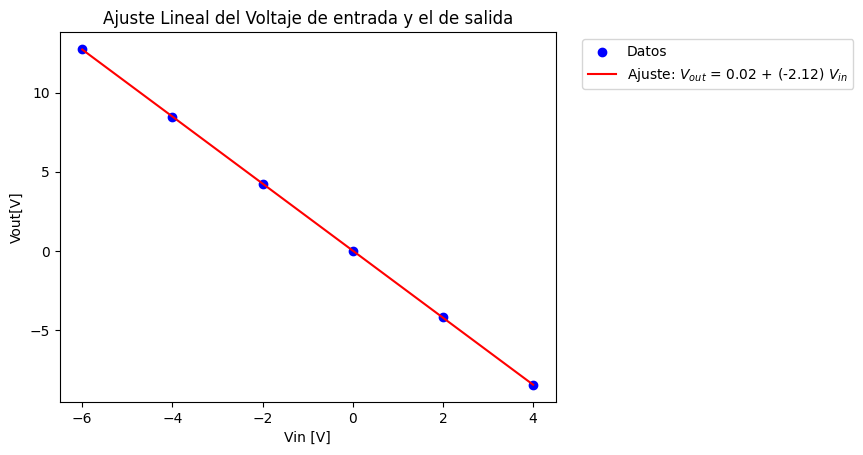

El valor de la amplificacion experimental es: -2.115


In [327]:
#Limitamos los datos para el ajuste lineal.
VoltajeIn = VoltajeInT[2:8].copy()
VoltajeOut = VoltajeOutT[2:8].copy()
#VoltajeIn = sorted(VoltajeInSor)
#VoltajeOut = sorted(VoltajeOutSor,reverse=True)
#print(VoltajeIn)
VoltajeIn,VoltajeOut = ConverArray2(VoltajeIn,VoltajeOut)

#Ponemos los datos en una tabla.
data = {'Vin [V]': VoltajeIn,
        'Vout[V]': VoltajeOut}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')

# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slopeinversor, interceptinversor], r = np.polyfit(VoltajeIn,VoltajeOut,deg=1,cov=True)
print("R=", slopeinversor,"\nOrdenada en el origen: ", interceptinversor,"\n coorel coef=",r)

# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return interceptinversor + slopeinversor * x

# Graficamos los datos y el ajuste lineal
plt.scatter(VoltajeIn, VoltajeOut, label='Datos', color='blue')
plt.plot(VoltajeIn, ajuste_lineal(VoltajeIn), color='red', label=fr'Ajuste: $V_{{out}}$ = {interceptinversor:.2f} + ({slopeinversor:.2f}) $V_{{in}}$')
plt.xlabel('Vin [V]')
plt.ylabel('Vout[V]')
plt.title('Ajuste Lineal del Voltaje de entrada y el de salida')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

print(f'El valor de la amplificacion experimental es: {slopeinversor}')

---
<h1 style="text-align: center;">[P2.C4]</h1>

---




In [328]:
#Preparamos los datos para que el ajuste lineal, la curva y los datos experimentales.

#Parte Teórica
VinT = np.linspace(0,9,40)
R1T = Rmedida1[0]
R2T = Rmedida1[0]
AvT = -(R2T/R1T)
VoutT = AvT * VinT

#Parte Experimental
VinE = np.linspace(0,9,40)
AvE = slopeinversor
VoutE = AvE * VinE

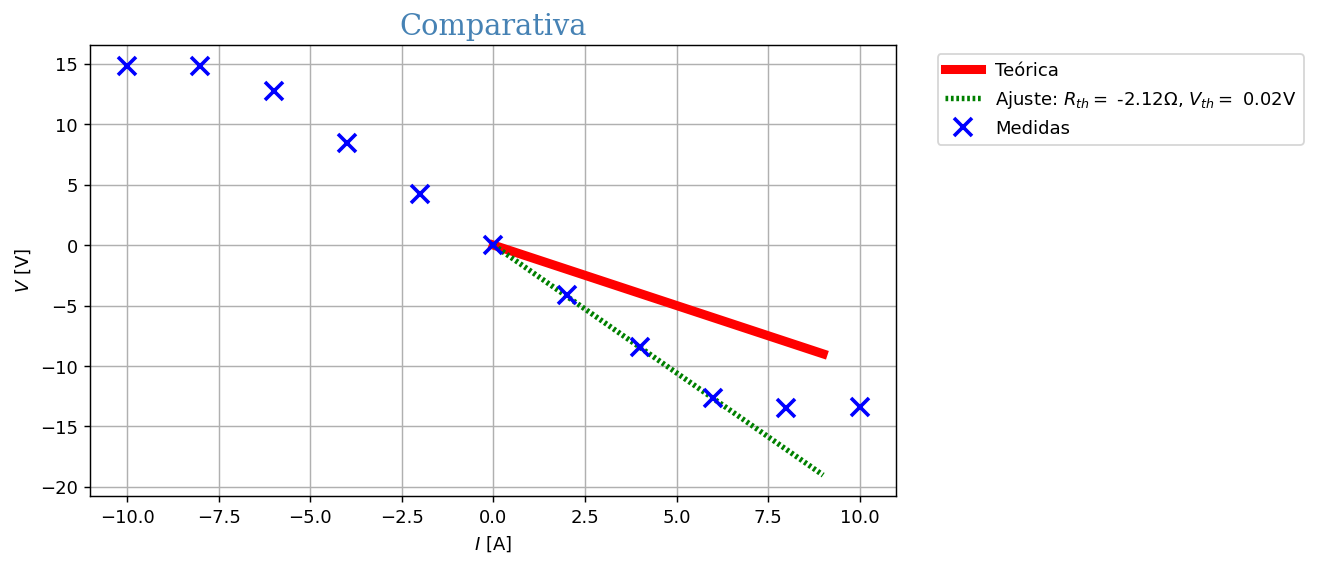

In [329]:
plt.figure(figsize=(8, 4.5), dpi=130)
plt.title("Comparativa", fontdict = {'family':'serif','color':'steelblue','size':16})
#plt.scatter(0, VoltajeTeo, color="black", s=100, label="Corte con la Ordenada")
plt.plot(VinT,VoutT, color="r", lw=5,label="Teórica")
plt.plot(VinE,VoutE, color="green",dashes=[0.5, 0.5],lw=3,label=fr"Ajuste: $R_{{th}}=$ {round(AvE,2)}$\Omega$, $V_{{th}}=$ {round(interceptinversor,2)}V")
plt.plot(VoltajeInT,VoltajeOutT, color="b",ls="",marker='x',ms=10,markeredgewidth=2,label="Medidas")
plt.xlabel(r"$I$ [A]")
plt.ylabel(r"$V$ [V]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid()
plt.show()

---
<h1 style="text-align: center;">[P2.C5]</h1>

---


In [330]:
print(f'R3 Teorico: {Rmedida3[0]} KOhms   R3 Práctico: {Rmedida3[1]} KOhms')

R3 Teorico: 2200 KOhms   R3 Práctico: 2140 KOhms


Con estos valores de las resistencias teoricos, obtenemos la ganancia teórica, esta ganancia tiene la siguiente expressión:

$A_V\ =\ 1+\dfrac{R_2}{R_3}$


In [331]:
print(f'El valor de la ganancia es: {1+(Rmedida2[0]/Rmedida3[0])} .')

El valor de la ganancia es: 5.545454545454546 .


---
<h1 style="text-align: center;">[P2.C6]</h1>

---


In [332]:
DatosTarea2 = pd.read_excel(xlsx_name,sheet_name='Tarea2',usecols='A:B')

VoltajeInT2 = DatosTarea2["Vin"].tolist()
VoltajeOutT2 = DatosTarea2["Vout"].tolist()

In [333]:
#Limitamos los datos para el ajuste lineal.
VoltajeIn2 = VoltajeInT2
VoltajeOut2 = VoltajeOutT2

#Ponemos los datos en una tabla.
data = {'Vin [V]': VoltajeIn2,
        'Vout[V]': VoltajeOut2}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')

# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slope, intercept], r = np.polyfit(VoltajeIn2,VoltajeOut2,deg=1,cov=True)
print("R=", slope,"\nOrdenada en el origen: ", intercept,"\n coorel coef=",r)

# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return intercept + slope * x

# Graficamos los datos y el ajuste lineal
plt.scatter(VoltajeIn2, VoltajeOut2, label='Datos', color='blue')
plt.plot(VoltajeIn2, ajuste_lineal(VoltajeOut2), color='red', label=fr'Ajuste: $V_{{out}}$ = {intercept:.2f} + ({slope:.2f}) $V_{{in}}$')
plt.xlabel('Vin [V]')
plt.ylabel('Vout[V]')
plt.title('Ajuste Lineal del Voltaje de entrada y el de salida')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

print(f'El valor de la amplificacion experimental es: {slope}')

Datos:
Empty DataFrame
Columns: [Vin [V], Vout[V]]
Index: []

Datos ajuste: 

TypeError: expected non-empty vector for x

In [ ]:
#Tomamos el valor del Voltaje Thevenin que anteriormente hemos extraido.
VoltajeThevenin = Voltaje2[0]
DatosTarea3 = pd.read_excel(xlsx_name,sheet_name='Tarea3',usecols='A:B')#Cargamos las columnas que vamos a usar.
#Practico
VoltajeAB = DatosTarea3['Vab'].tolist()
IntensidadAB = DatosTarea3['Iab'].tolist()
RTV = Rmedida5[1]

#Teorico
RTVTeo = Rmedida5[0]
VoltajeTeo = Voltaje1[0]

#Transformamos los vectores con numpy en arrays
VoltajeAB = np.array(VoltajeAB)
IntensidadAB = np.array(IntensidadAB)*1e-3
print(f'Intensidades = {IntensidadAB} A.')
print(f' Voltajes = {VoltajeAB} V.')
print(f'Resistencia Thevenin = {RTV} KOhms.')


Intensidades = [0.00082 0.00081 0.00068 0.00058 0.00051 0.00047 0.00038 0.00031 0.00029
 0.00026 0.00024] A.
 Voltajes = [0.    0.044 0.592 0.993 1.29  1.47  1.8   2.06  2.14  2.26  2.29 ] V.
Resistencia Thevenin = 4.0 KOhms.


Datos:
       I[A]   V[V]
0   0.00082  0.000
1   0.00081  0.044
2   0.00068  0.592
3   0.00058  0.993
4   0.00051  1.290
5   0.00047  1.470
6   0.00038  1.800
7   0.00031  2.060
8   0.00029  2.140
9   0.00026  2.260
10  0.00024  2.290

Datos ajuste: R= -3996.1148985368586 
Ordenada en el origen:  3.3016558824702007 
 coorel coef= [[ 1.73562172e+03 -8.44143292e-01]
 [-8.44143292e-01  4.82518617e-04]]


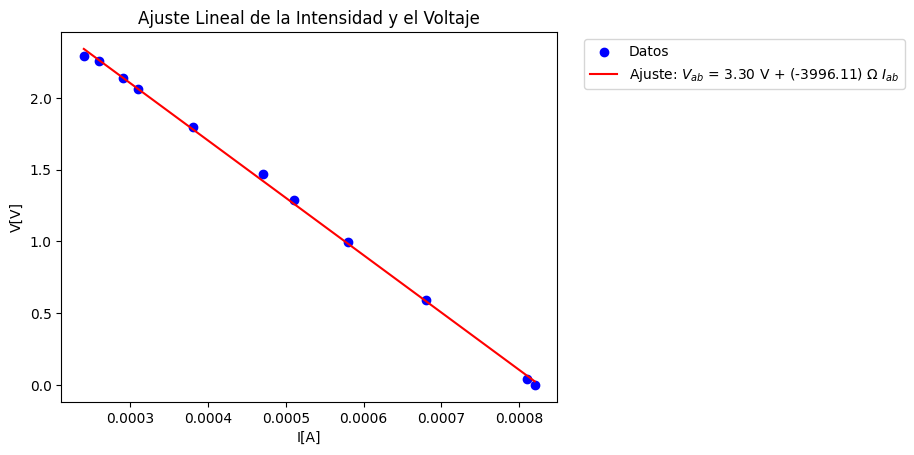

In [ ]:
#Ponemos los datos en una tabla.
data = {'I[A]': IntensidadAB,
        'V[V]': VoltajeAB}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')
# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slope, intercept], r = np.polyfit(IntensidadAB,VoltajeAB,deg=1,cov=True)
print("R=", slope,"\nOrdenada en el origen: ", intercept,"\n coorel coef=",r)

# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return intercept + slope * x

# Graficamos los datos y el ajuste lineal
plt.scatter(IntensidadAB, VoltajeAB, label='Datos', color='blue')
plt.plot(IntensidadAB, ajuste_lineal(IntensidadAB), color='red', label=fr'Ajuste: $V_{{ab}}$ = {intercept:.2f} V + ({slope:.2f}) $\Omega$ $I_{{ab}}$')
plt.xlabel('I[A]')
plt.ylabel('V[V]')
plt.title('Ajuste Lineal de la Intensidad y el Voltaje')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

---
<h1 style="text-align: center;">[P1.C7]</h1>

---
Ahora haremos una gráfica que comparara el valor teorico y el experimental medidos en [P1.C6]

In [ ]:
Rfit=slope

Vfit0=intercept

#Genero un vector de intensidades dentro del rango medido
Ifit=np.linspace(0,0.0008,40)

#A partir de los parámetros ajustados genero el volaje
Vfit=Vfit0+Ifit*Rfit

Rteo=RTVTeo*1e3
Iteo=np.linspace(0,0.0008,50)
Vteo=VoltajeTeo-Iteo*Rteo

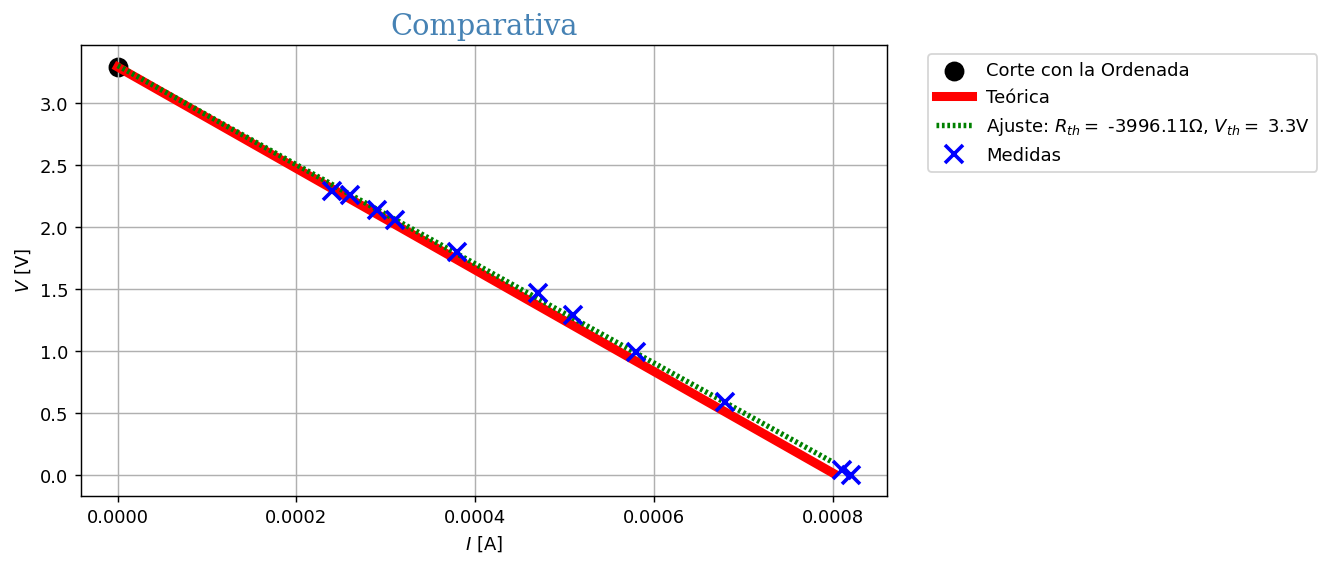

In [ ]:
plt.figure(figsize=(8, 4.5), dpi=130)
plt.title("Comparativa", fontdict = {'family':'serif','color':'steelblue','size':16})
plt.scatter(0, VoltajeTeo, color="black", s=100, label="Corte con la Ordenada")
plt.plot(Iteo,Vteo, color="r", lw=5,label="Teórica")
plt.plot(Ifit,Vfit, color="green",dashes=[0.5, 0.5],lw=3,label=fr"Ajuste: $R_{{th}}=$ {round(Rfit,2)}$\Omega$, $V_{{th}}=$ {round(Vfit0,2)}V")
plt.plot(IntensidadAB,VoltajeAB, color="b",ls="",marker='x',ms=10,markeredgewidth=2,label="Medidas")
plt.xlabel(r"$I$ [A]")
plt.ylabel(r"$V$ [V]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid()
plt.show()

---
<h1 style="text-align: center;">[P1.C8]</h1>

---
Mostramos ahora las tablas correspondientes al ....


In [ ]:
VoltajeError = []
ResError =[]

VoltajeExp = ["---" , Voltajes[1],"---",Vfit0.round(4)]
VoltajeTeo = ["---",Voltajes[0],"---",VoltajeTeo]
for i in range(0,len(VoltajeExp)):
    if VoltajeTeo[i] != 0 and VoltajeTeo[i] !='---': 
        Error = (abs(VoltajeExp[i]-VoltajeTeo[i])/abs(VoltajeTeo[i]))*100
        Error = round(Error,4)
        VoltajeError.append(Error)
    else:
        VoltajeError.append('---')

ResExp =[Rmedida5[1],"---",Rpotenciometro[0],RTV]
ResTeo = [Rmedida5[0],"---",Rmedida5[0],Rteo/1e3]
for i in range(0,len(ResExp)):
    if ResTeo[i] != 0 and ResTeo[i] !='---': 
        Error = ((abs(ResExp[i]-ResTeo[i])/abs(ResTeo[i]))*100)
        Error = round(Error,4)
        ResError.append(Error)
    else:
        ResError.append('---')

VoltajeExp=np.array(VoltajeExp)
ResExp=np.array(ResExp)
VoltajeTeo = np.array(VoltajeTeo)
ResExp = np.array(ResExp)
ResError = np.array(ResError)
VoltajeError = np.array(VoltajeError)

data = {
    'V_Exp (v)': VoltajeExp,
    "V_Teo (v)": VoltajeTeo,
    'Error Voltaje': VoltajeError,
    "R_Exp (KOhms)": ResExp,
    "R_Teo (KOhms)": ResTeo,
    "Error Resi.$": ResError
}
# Crear el DataFrame con los nombres de las columnas en formato LaTeX
df = pd.DataFrame(data)
df.index = ['C2', 'C3', 'C4', 'C5']
# Mostrar el DataFrame
print(df.T)

                   C2      C3      C4      C5
V_Exp (v)         ---    3.27     ---  3.3017
V_Teo (v)         ---    3.29     ---    3.29
Error Voltaje     ---  0.6079     ---  0.3556
R_Exp (KOhms)     4.0     ---     4.0     4.0
R_Teo (KOhms)    4.09     ---    4.09    4.09
Error Resi.$   2.2005     ---  2.2005  2.2005


MINI DISCUSION DATOS